In [539]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# from google.colab import files
# uploaded = files.upload()
%matplotlib inline

In [540]:
# to read on google colab
# import io
# dataframe = pd.read_csv(io.BytesIO(uploaded['weatherHistory.csv']))

In [541]:
dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Collecting the datat that is needed

In [542]:
dataframe = dataframe.loc[:,['Apparent Temperature (C)', 'Humidity']]

In [543]:
dataframe.head()

,Apparent Temperature (C),Humidity
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [544]:
dataframe.rename(columns={'Apparent Temperature (C)':'y','Humidity':'x'}, inplace=True)


In [545]:
dataframe.head()

,y,x
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [546]:
dataframe.isna().sum()

y    0
x    0
dtype: int64

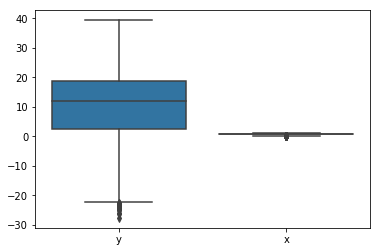

In [547]:
sns.boxplot(data = dataframe)

As the data of y is much larger than x we need to rescale the data

In [548]:
# using min max
def feature_scaling_column(dataframe, column_scaling):
    max_min_col = dataframe[column_scaling].max()-dataframe[column_scaling].min()
    dataframe[column_scaling] = np.divide(np.subtract(
        dataframe[column_scaling],dataframe[column_scaling].min()),max_min_col)
    print("successfully scaled column ",column_scaling)
    return dataframe

In [549]:
dataframe = feature_scaling_column(dataframe, 'y')

successfully scaled column  y


In [550]:
dataframe.y.head()

0    0.523486
1    0.521084
2    0.553144
3    0.501947
4    0.517356
Name: y, dtype: float64

In [551]:
dataframe = feature_scaling_column(dataframe, 'x')

successfully scaled column  x


In [552]:
dataframe.head()

,y,x
0,0.523486,0.89
1,0.521084,0.86
2,0.553144,0.89
3,0.501947,0.83
4,0.517356,0.83


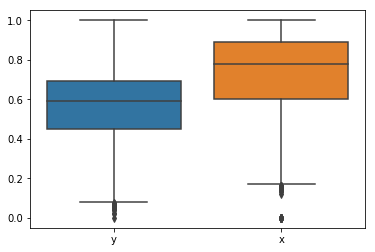

In [553]:
sns.boxplot(data = dataframe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bf4b8f2b0>,
      dtype=object)

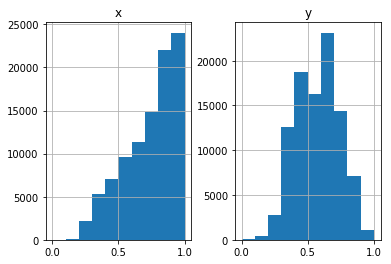

In [554]:
dataframe.hist()

In [555]:
dataframe.describe()

,y,x
count,96453.000000,96453.000000
mean,0.575172,0.734899
std,0.159509,0.195473
min,0.000000,0.000000
25%,0.447767,0.600000
50%,0.592246,0.780000
75%,0.694226,0.890000
max,1.000000,1.000000


/home/admin1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


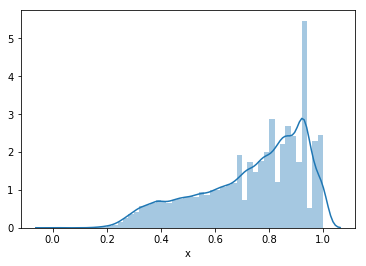

In [556]:
sns.distplot(dataframe.x)

/home/admin1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


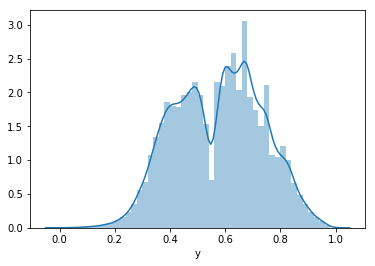

In [557]:
sns.distplot(dataframe.y)

In [558]:
# splitting data for training and testing
test_data = dataframe.tail(300).reset_index(drop=True)
test_data.head()

,y,x
0,0.695966,0.52
1,0.696297,0.48
2,0.712866,0.45
3,0.711457,0.49
4,0.711457,0.49


In [559]:
dataframe = dataframe.head(len(dataframe)-300)
dataframe.head()

,y,x
0,0.523486,0.89
1,0.521084,0.86
2,0.553144,0.89
3,0.501947,0.83
4,0.517356,0.83


In [560]:
dataframe.describe()

,y,x
count,96153.000000,96153.000000
mean,0.574833,0.735083
std,0.159564,0.195355
min,0.000000,0.000000
25%,0.447353,0.600000
50%,0.591417,0.780000
75%,0.694060,0.890000
max,1.000000,1.000000


In [561]:
def Linear_Regression():
    cost = np.empty(0)
    # y = wx+b
    learning_rate = 0.0001
    weight = 0.01
    bais = 0.01
    fig = plt.figure()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))
    ax4.scatter(dataframe.x,dataframe.y, s=0.4, color='g')
    df_size = len(dataframe)
    for counter in range(0,100000):
        # creating the predicted output by our supposed values of w and b
        Ypred = pd.Series(np.add(np.multiply(weight,dataframe.x),bais))
        # loss =  1/2m sum of (y^ - y)**2
        diff_pred = np.subtract(Ypred,dataframe.y)
        
        # squaring each term
        loss = np.square(diff_pred)
        loss_error_sum = loss.sum()
        loss_error_sum /= (2*df_size)
        # storing the costs so that we can check which is min
        # cost = np.append(cost, loss_error_sum)
        
        # calculate d/d0 of j0,01
        derivate_b = (np.sum(diff_pred))
        derivate_w = np.sum(np.multiply(dataframe.x, diff_pred))
        # update w and b in line equation
        weight = np.subtract(weight,np.multiply(learning_rate,np.divide(derivate_w,df_size)))
        bais = np.subtract(bais,np.multiply(learning_rate,np.divide(derivate_b,df_size)))
        if counter % 10 == 0 :
            plt.title("w vs error")
            # plt.plot(counter,loss_error_sum, marker='x', color='r')
            ax1.plot(weight,loss_error_sum,marker='o',color='r')
            plt.title('b vs error')
#             plt.xticks(rotation=45)
            ax2.plot(bais,loss_error_sum,marker='x',color='g')
            plt.title('iteration vs error')
            ax3.plot(counter,loss_error_sum,marker='x',color='b')
            
        if(loss_error_sum<=0.00009): 
            break
    plt.subplots_adjust(hspace=1.5)
    plt.show()
    print("counter = {} and cost function = {}".format(counter, loss_error_sum))
    return (weight, bais)

<Figure size 432x288 with 0 Axes>

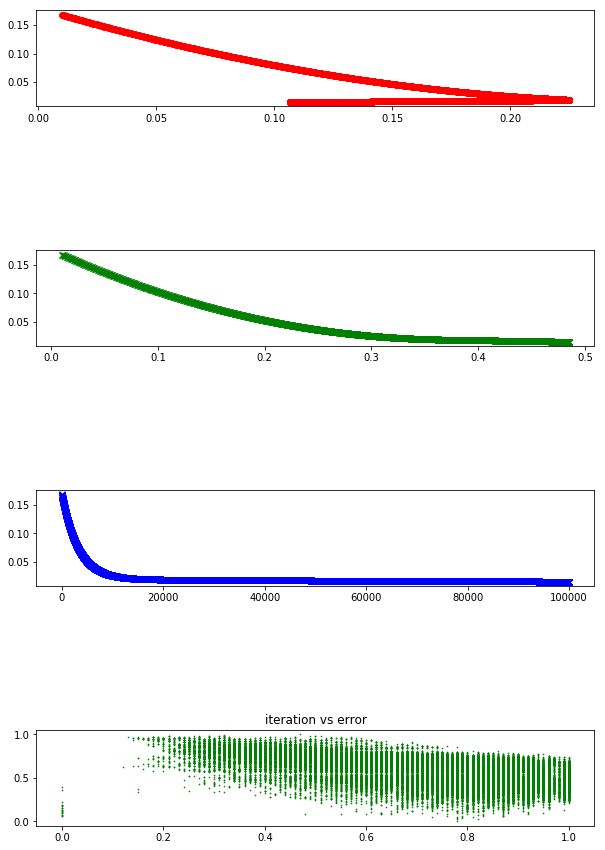

counter = 99999 and cost function = 0.01501447953179747


In [562]:
weight,bais = Linear_Regression()

In [563]:
print("w is {}, b is {}".format(weight, bais))

w is 0.10680211553697065, b is 0.4852428071761736


In [564]:
def testing(dataframe):
#   dataframe = pd.read_csv('test.csv')
    Ypred = pd.Series(np.multiply(weight, dataframe.x) + bais)
    for counter in range(0, len(dataframe)):
        Ypred[counter]=(abs(Ypred[counter]-dataframe.y[counter])/dataframe.y[counter])
#     error_predicts = np.divide((abs(Ypred-dataframe.y)),dataframe.y)
        plt.plot(counter,Ypred[counter],marker='+',color='g')
    plt.show()
    error = np.sum(Ypred)/len(dataframe)
    return (1-error)*100

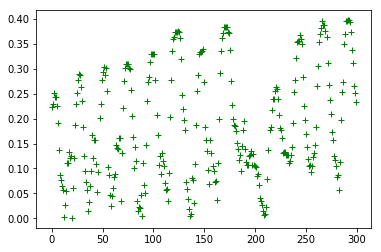

In [565]:
accuracy = testing(test_data)

In [566]:
accuracy

81.21046490512703

In [567]:
np.square(2)

4